In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
# include the library for this project
sys.path.append('~/Documents/machine_learning/projects/stock_price_predictions/libs')

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
data_loc = "~/Documents/machine_learning/projects/stock_price/natural_gas/"

In [5]:
FONTSIZE1 = 16
FONTSIZE2 = 14
FONTSIZE3 = 12

## 1. Basic data analyses

### 1.1. check summary data

In [6]:
data_loc_summary_1 = data_loc + "summary/" + "NG_SUM_LSUM_DCU_NUS_M/"

table_manifest = {"Data 1": "Prices", "Data 2": "Production",
                  "Data 3": "Imports and Exports", "Data 4": "Underground Storage", 
                  "Data 5": "Consumption"}



In [7]:
tab_name = "Data 1-Table 1.csv"
data_price = pd.read_csv(data_loc_summary_1 + tab_name, skiprows=2, header = 0)

tab_name = "Data 2-Table 1.csv"
data_production = pd.read_csv(data_loc_summary_1 + tab_name, skiprows=2, header = 0)

tab_name = "Data 3-Table 1.csv"
data_imp_exp = pd.read_csv(data_loc_summary_1 + tab_name, skiprows=2, header = 0)

tab_name = "Data 4-Table 1.csv"
data_underg_sto = pd.read_csv(data_loc_summary_1 + tab_name, skiprows=2, header = 0)

tab_name = "Data 5-Table 1.csv"
data_consump = pd.read_csv(data_loc_summary_1 + tab_name, skiprows=2, header = 0)

In [8]:
tab_list = [data_price, data_production, data_imp_exp, data_underg_sto, data_consump]

In [9]:
tab_dict = {}

In [10]:
# 

In [11]:
for tab_name, df in zip(table_manifest.keys(), tab_list):
    print(f"{tab_name:>10}, shape: {df.shape}")
    print(f"{df.iloc[0,0]:>10}")
    tab_dict[table_manifest[tab_name]] = df

    Data 1, shape: (571, 14)
  Jan-1973
    Data 2, shape: (571, 13)
  Jan-1973
    Data 3, shape: (571, 8)
  Jan-1973
    Data 4, shape: (571, 9)
  Jan-1973
    Data 5, shape: (571, 11)
  Jan-1973


In [12]:
# conver to period
for tab_name, df in zip(table_manifest.keys(), tab_list):
    print(f"{tab_name:>10}")
    df["Date"] = pd.to_datetime(df["Date"]).dt.to_period("M")
    df = df.set_index(keys="Date", drop=True, inplace=True)

    Data 1
    Data 2
    Data 3
    Data 4
    Data 5


In [13]:
data_consump.head(2)

,U.S. Natural Gas Total Consumption (MMcf),U.S. Natural Gas Lease and Plant Fuel Consumption (MMcf),U.S. Natural Gas Pipeline & Distribution Use (MMcf),Natural Gas Delivered to Consumers in the U.S. (MMcf),U.S. Natural Gas Residential Consumption (MMcf),Natural Gas Deliveries to Commercial Consumers (Including Vehicle Fuel through 1996) in the U.S. (MMcf),U.S. Natural Gas Industrial Consumption (MMcf),U.S. Natural Gas Vehicle Fuel Consumption (MMcf),U.S. Natural Gas Deliveries to Electric Power Consumers (MMcf),Unnamed: 10
Date,,,,,,,,,,
1973-01,NaN,NaN,NaN,NaN,843900,392315,NaN,NaN,NaN,NaN
1973-02,NaN,NaN,NaN,NaN,747331,394281,NaN,NaN,NaN,NaN


Text(0, 0.5, 'U.S. Natural Gas Total Consumption (MMcf)')

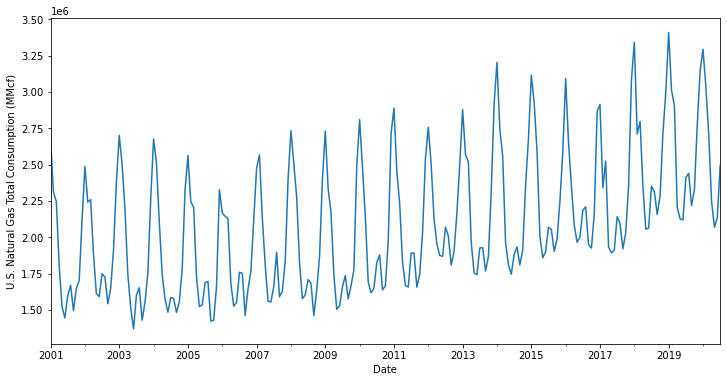

In [15]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

col_names = data_consump.columns.tolist()
data_consump.dropna(subset=[col_names[0]])[col_names[0]].plot(ax=ax)

ax.set_ylabel(col_names[0])

Production, plot U.S. Natural Gas Gross Withdrawals (MMcf)
Underground Storage, plot U.S. Total Natural Gas Underground Storage Capacity (MMcf)
Consumption, plot U.S. Natural Gas Total Consumption (MMcf)


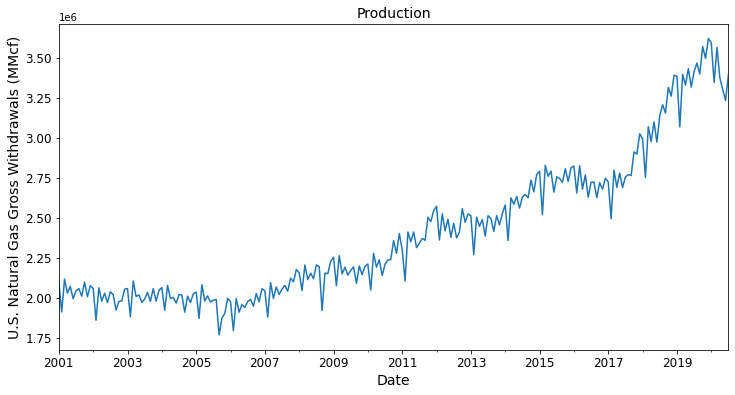

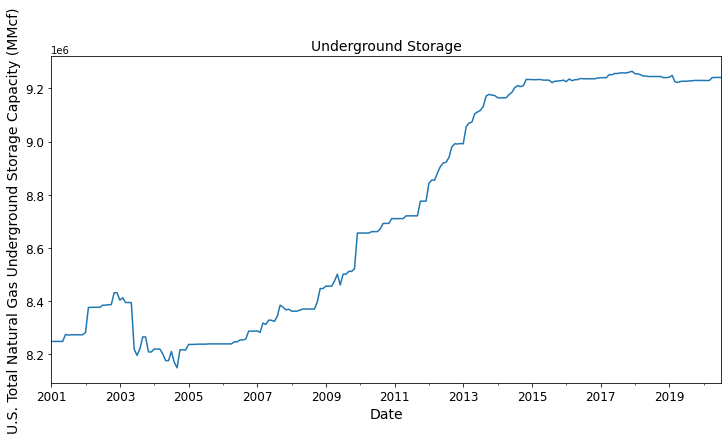

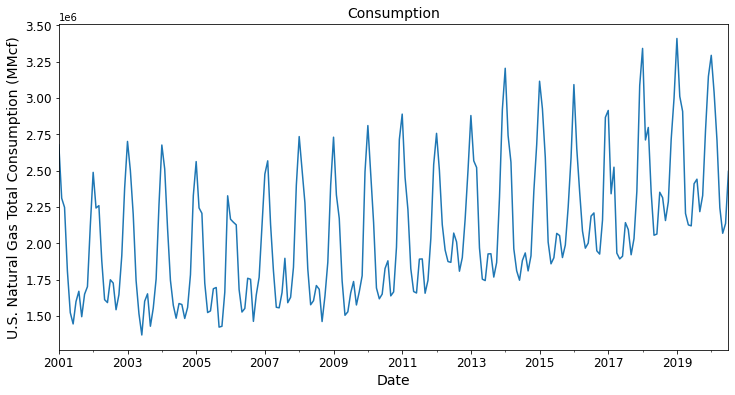

In [16]:
for tab_name, df in tab_dict.items():
    
    start_time = "2001-01"
    
    if (tab_name in ["Prices", "Imports and Exports"]):
        # skip these data
        continue
        
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    
    col_names = df.columns.tolist()
    print(f"{tab_name:>10}, plot {col_names[0]}")
    
    if start_time is None:
        df.dropna(subset=[col_names[0]])[col_names[0]].plot(ax=ax)
    else:
        df.dropna(subset=[col_names[0]])[start_time:][col_names[0]].plot(ax=ax)    

    ax.set_title(tab_name, fontsize=FONTSIZE2)
    ax.tick_params(axis='both', labelsize=FONTSIZE3)
    ax.set_ylabel(col_names[0], fontsize=FONTSIZE2)
    ax.xaxis.label.set_size(FONTSIZE2)

**take a close look at the import and export data**

In [17]:
print(tab_dict.keys())

dict_keys(['Prices', 'Production', 'Imports and Exports', 'Underground Storage', 'Consumption'])


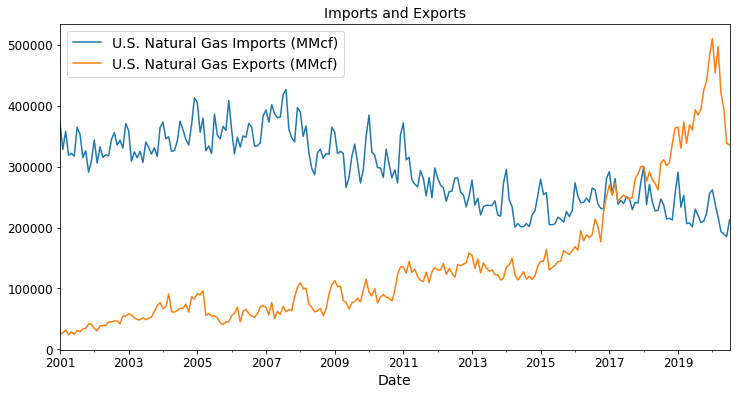

In [18]:
df_tmp = tab_dict["Imports and Exports"]

# only for the total import and export
cols_of_interest = ['U.S. Natural Gas Imports (MMcf)', 'U.S. Natural Gas Exports (MMcf)']
ax = df_tmp[cols_of_interest][start_time:].plot(figsize=(12,6))

ax.legend(fontsize=FONTSIZE2)
ax.tick_params(axis='both', labelsize=FONTSIZE3)
ax.set_title("Imports and Exports", fontsize=FONTSIZE2)

ax.xaxis.label.set_size(FONTSIZE2)
ax.yaxis.label.set_size(FONTSIZE2)

**take a close look at the price data**

In [19]:
df_tmp = tab_dict["Prices"]

In [20]:
cols_names = df_tmp.columns.tolist()

cols_names_new = ["Wellhead", 
                  "Import", "Import-Pipeline", "Import-LNS", 
                  "Export", "Export-Pipeline", "Export-LNS", 
                  "Citygate", "Residential", 
                  "Commercial", "Industrial", 
                  "ElectricPower", 'Unnamed: 13']

col_new_names_dict = {}
col_new_names_dict_rev = {}
for col, col_new in zip(cols_names, cols_names_new):
    col_new_names_dict[col_new] = col
    col_new_names_dict_rev[col] = col_new

In [21]:
cols_of_interest = ["Import", "Export", "Citygate", "Residential", 
                    "Commercial", "Industrial", "ElectricPower"]

In [22]:
cols_of_interest_org = list(map(lambda x: col_new_names_dict[x], cols_of_interest))

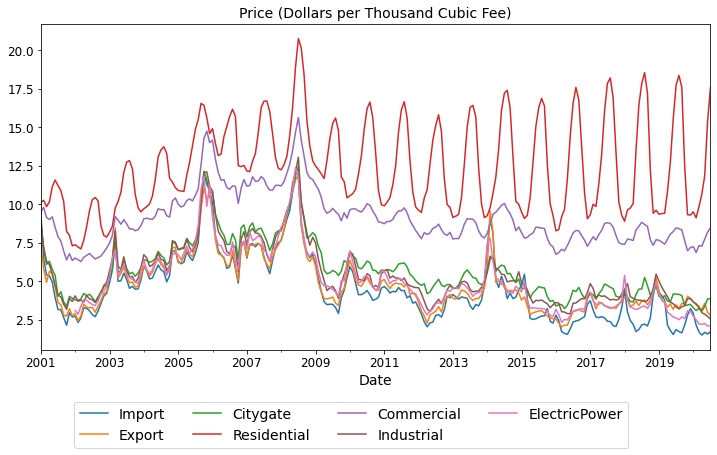

In [23]:
cols_of_interest = ["Import", "Export", "Citygate", "Residential", 
                    "Commercial", "Industrial", "ElectricPower"]

ax = df_tmp.rename(columns=col_new_names_dict_rev)[cols_of_interest][start_time:].plot(figsize=(12,6))

ax.legend(fontsize=FONTSIZE2, ncol=4, loc=(0.05, -0.3))
ax.tick_params(axis='both', labelsize=FONTSIZE3)
ax.set_title("Price (Dollars per Thousand Cubic Fee)", fontsize=FONTSIZE2)

ax.xaxis.label.set_size(FONTSIZE2)
ax.yaxis.label.set_size(FONTSIZE2)

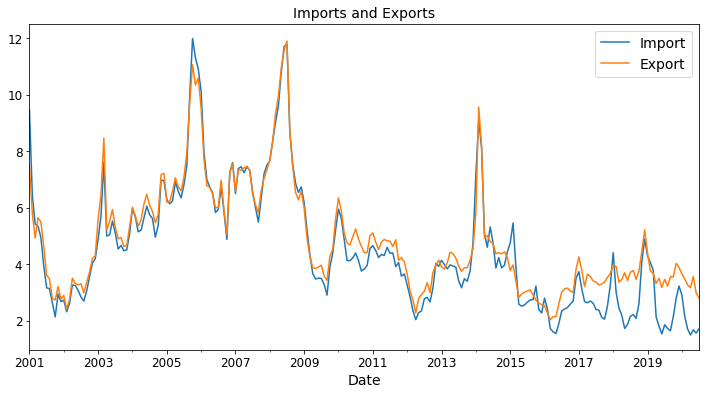

In [24]:
cols_of_interest = ["Import", "Export"]

ax = df_tmp.rename(columns=col_new_names_dict_rev)[cols_of_interest][start_time:].plot(figsize=(12,6))

ax.legend(fontsize=FONTSIZE2)
ax.tick_params(axis='both', labelsize=FONTSIZE3)
ax.set_title("Imports and Exports", fontsize=FONTSIZE2)

ax.xaxis.label.set_size(FONTSIZE2)
ax.yaxis.label.set_size(FONTSIZE2)

### 1.2. check the spot price

In [25]:
# spot price, daily data

data_loc_spot_daily = data_loc + "Henry_Hub_Natural_Gas_Spot_Price_daily_data.csv"

In [26]:
data_spot_price_daily = pd.read_csv(data_loc_spot_daily, skiprows=4, header = 0)
print(data_price.shape)

(571, 13)


In [27]:
data_spot_price_daily.head(2)

,Day,Henry Hub Natural Gas Spot Price Dollars per Million Btu
0,09/28/2020,1.83
1,09/25/2020,1.90


In [28]:
data_spot_price_daily["Day"] = pd.to_datetime(data_spot_price_daily["Day"])

In [29]:
data_spot_price_daily.set_index(keys="Day", drop=True, inplace=True)

/Users/lcx/anaconda3/envs/DL/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


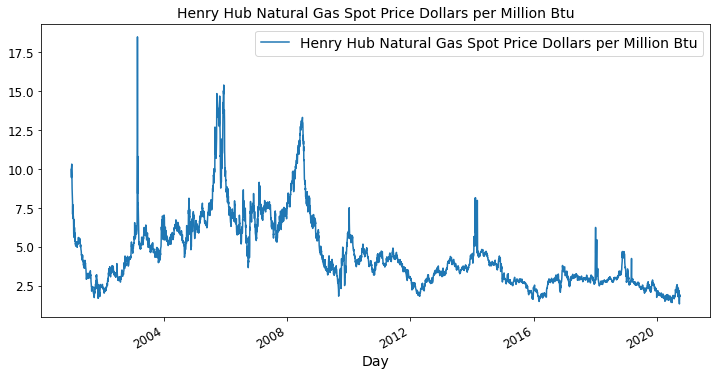

In [33]:
cols_name = data_spot_price_daily.columns.tolist()

# ax = data_spot_price_daily[start_time:].plot(figsize=(12,6))
plt.rcParams['date.epoch'] = '0000-12-31'

ax = data_spot_price_daily[::-1][start_time:][cols_name[0]].plot(figsize=(12,6))

ax.legend(fontsize=FONTSIZE2)
ax.tick_params(axis='both', labelsize=FONTSIZE3)
ax.set_title(cols_name[0], fontsize=FONTSIZE2)

ax.xaxis.label.set_size(FONTSIZE2)
ax.yaxis.label.set_size(FONTSIZE2)

### 1.3. check correlation

## 2. Create time Series

## 3. Train LSTM models